**Kaggle Dataset**

**Problem Statement:**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [160]:
#Importing dataset
df = pd.read_csv("/content/drive/MyDrive/Country-data.csv")

In [161]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


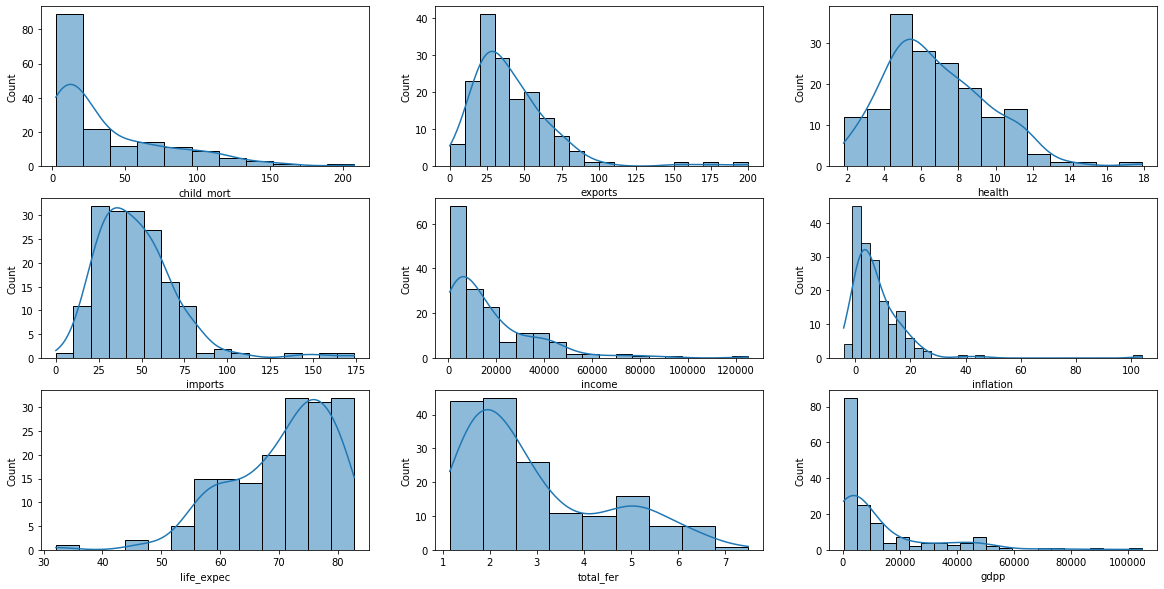

In [162]:
#plotting histogram to see distribution of numerical data
fig,ax = plt.subplots(3,3,figsize = (20,10))
sns.histplot(df['child_mort'],ax=ax[0,0],kde=True)
sns.histplot(df['exports'],ax=ax[0,1],kde=True)
sns.histplot(df['health'],ax=ax[0,2],kde=True)
sns.histplot(df['imports'],ax=ax[1,0],kde=True,)
sns.histplot(df['income'],ax=ax[1,1],kde=True)
sns.histplot(df['inflation'],ax=ax[1,2],kde=True)
sns.histplot(df['life_expec'],ax=ax[2,0],kde=True)
sns.histplot(df['total_fer'],ax=ax[2,1],kde=True)
sns.histplot(df['gdpp'],ax=ax[2,2],kde=True)

Looking at the above graphs we can say that the data is skewed and needs to be scaled

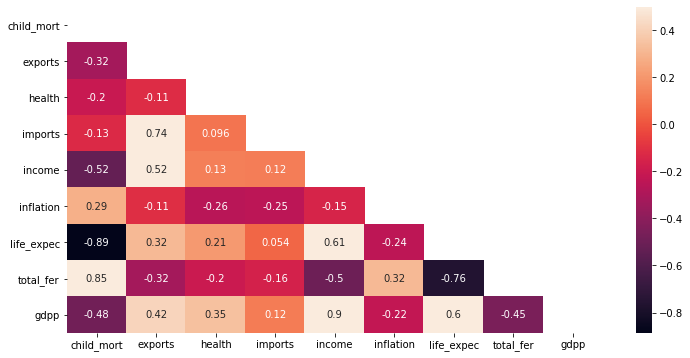

In [163]:
#plotting correlation matric
plt.figure(figsize=(12,6))
crr = df.drop('country',axis=1).corr()
mask = np.triu(np.ones_like(crr,dtype=bool))
sns.heatmap(crr,mask=mask,annot=True,vmax=0.5)

<Figure size 1008x504 with 0 Axes>

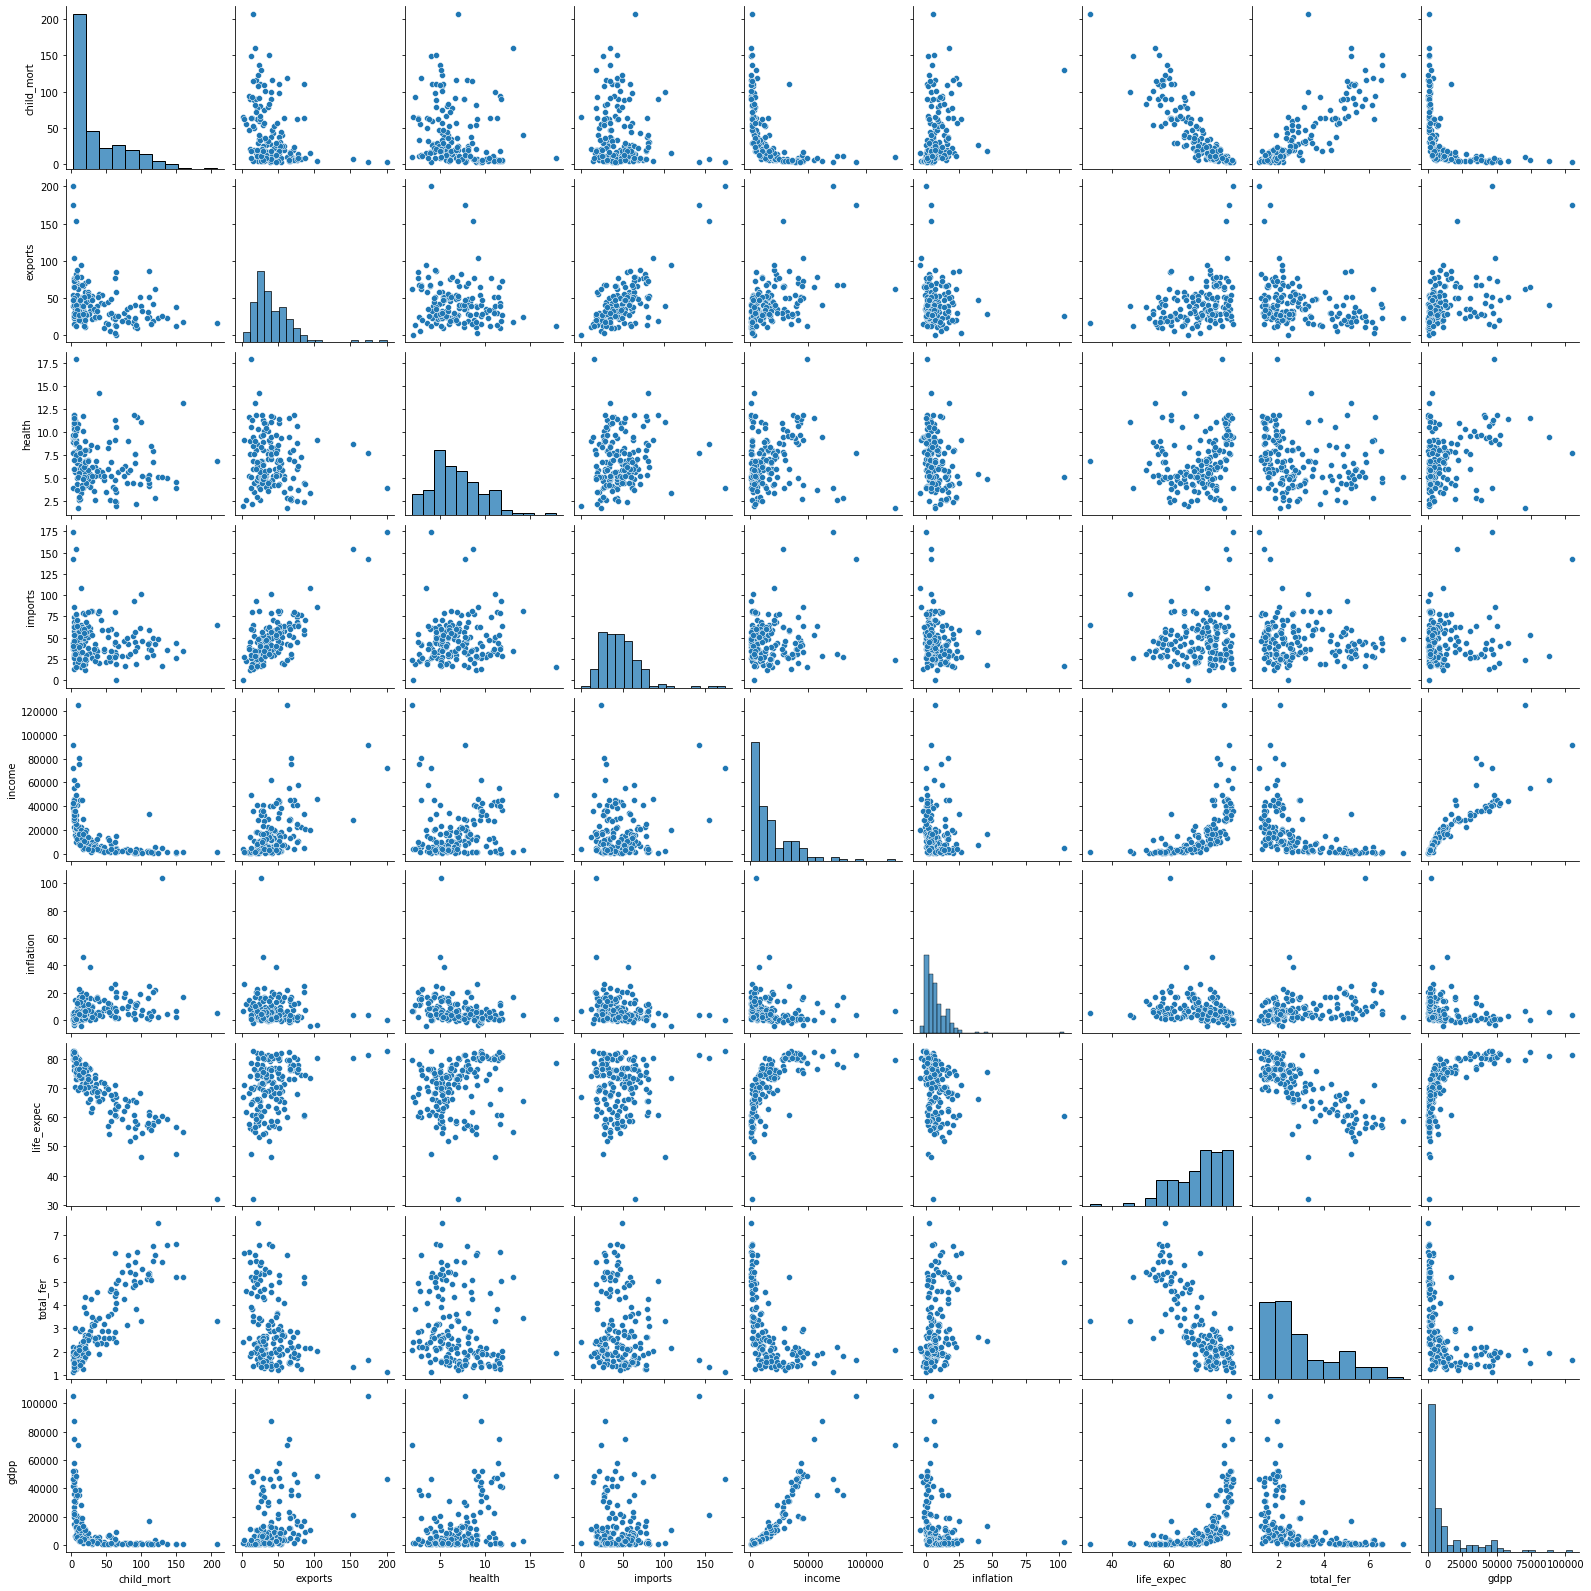

In [164]:
plt.figure(figsize=(14,7))
sns.pairplot(df.drop("country",axis=1))

child_mort and income,

gdpp and income,

life_expec and income

are highly correlated

In [165]:
pd.DataFrame(df.isnull().sum())

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [166]:
len(df['country'].unique())

167

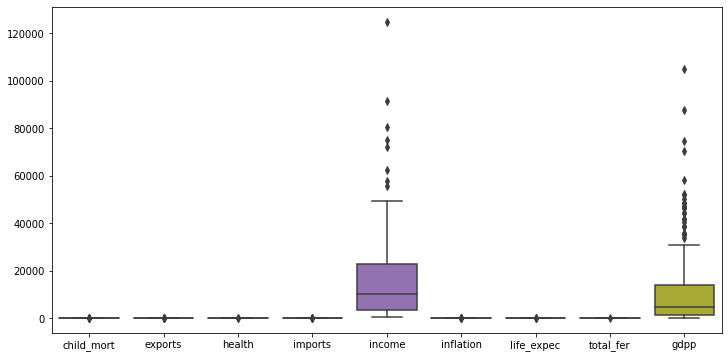

In [167]:
#checking for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("country",axis = 1))

In [168]:
#performing log tranformation
df["gdpp"]= np.log(df['gdpp'])
df["income"]= np.log(df['income'])

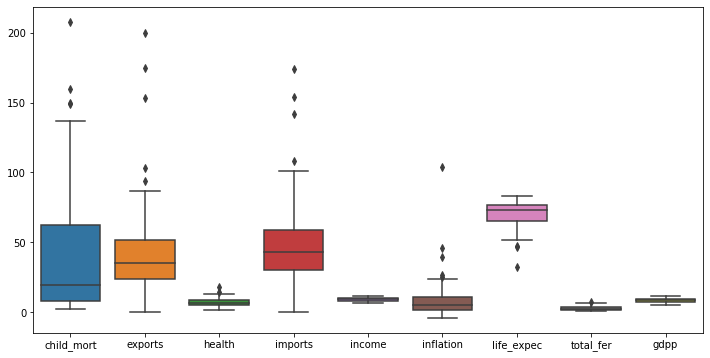

In [169]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("country",axis = 1))

In [170]:
df["child_mort"]= np.log(df['child_mort'])
df["exports"]= np.log(df['exports'])
df["imports"]= np.log(df['imports'])
df["inflation"]= np.log(df['inflation'])
df["life_expec"]=np.log(df["life_expec"])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


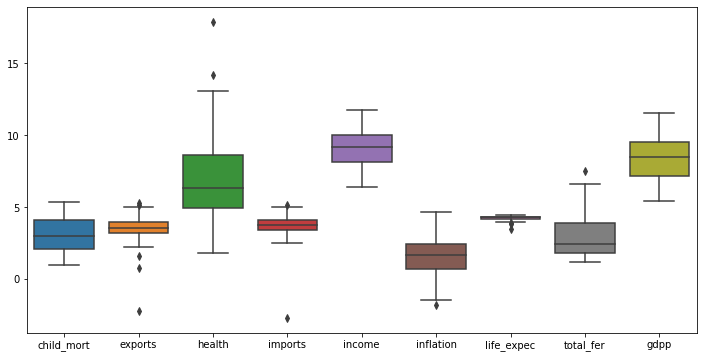

In [171]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("country",axis = 1))

In [172]:
df["life_expec"]=np.log(df["life_expec"])

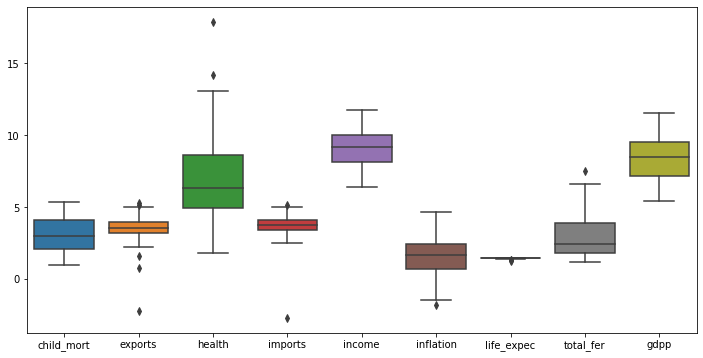

In [173]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("country",axis = 1))

In [174]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,4.502029,2.302585,7.58,3.804438,7.383989,2.244956,1.393498,5.82,6.315358
1,Albania,2.809403,3.332205,6.55,3.883624,9.203316,1.501853,1.466646,1.65,8.316300
2,Algeria,3.306887,3.648057,4.17,3.446808,9.464983,2.778819,1.467250,2.89,8.402904
3,Angola,4.779123,4.131961,2.85,3.758872,8.682708,3.109061,1.410013,6.16,8.169053
4,Antigua and Barbuda,2.332144,3.817712,6.03,4.075841,9.857444,0.364643,1.468152,2.13,9.409191


In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
sc = StandardScaler()

In [175]:
#scaling
df_scaled = sc.fit_transform(df.drop("country", axis = 1))

In [176]:
df_scaled  = pd.DataFrame(df_scaled, columns = df.columns[1:])

In [178]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.257285,-1.566676,0.279088,0.146381,-1.413059,0.607425,-1.557772,1.902882,-1.460560
1,-0.206196,-0.224045,-0.097016,0.262136,0.071749,-0.029221,0.621910,-0.859973,-0.122592
2,0.223939,0.187829,-0.966073,-0.376408,0.285304,1.064807,0.639900,-0.038404,-0.064683
3,1.496866,0.818843,-1.448071,0.079772,-0.353135,1.347738,-1.065636,2.128151,-0.221051
4,-0.618844,0.409060,-0.286894,0.543123,0.605603,-1.003513,0.666777,-0.541946,0.608191


In [179]:
#checking for nan values
df_scaled.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     8
life_expec    0
total_fer     0
gdpp          0
dtype: int64

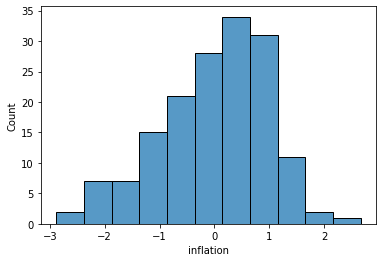

In [180]:
sns.histplot(df_scaled["inflation"])

In [181]:
df_scaled["inflation"].fillna(df_scaled["inflation"].mean(), inplace = True)

In [182]:
#Importing model for clusttering
from sklearn.cluster import KMeans

In [183]:
#Choosing right cluster value by comparing errors
cluster_range = range( 1, 9 )
cluster_errors = []

for num_clusters in cluster_range:
    
    clusters = KMeans( num_clusters )
    
    clusters.fit(df_scaled)
    
    cluster_errors.append( clusters.inertia_ )
    # clusters.inertia_ is basically cluster error here.

In [185]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:]

,num_clusters,cluster_errors
0,1,1495.000000
1,2,927.692478
2,3,756.394998
3,4,617.112338
4,5,551.537647
5,6,508.027609
6,7,471.071986
7,8,437.863524


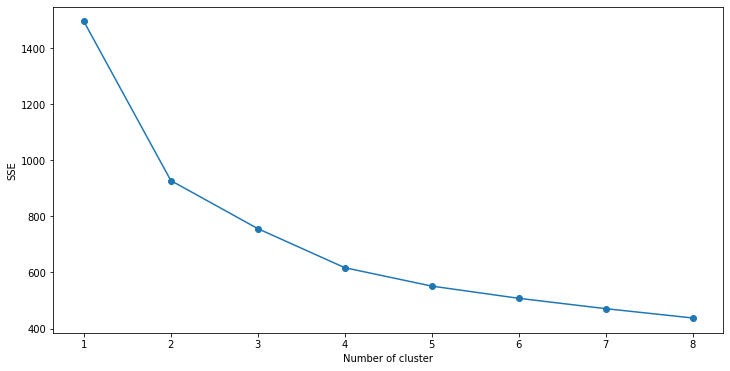

In [186]:
# allow plots to appear in the notebook
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

By the above graph we can see that cluster value is between 3-4

In [187]:
#finding cluster value using silhouette_score
from sklearn import metrics

# calculate SC for K=3 through K=12
k_range = range(2, 9)
scores = []


for k in k_range:
    
    km = KMeans(n_clusters=k, random_state=1)
    
    km.fit(df_scaled)
    
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))

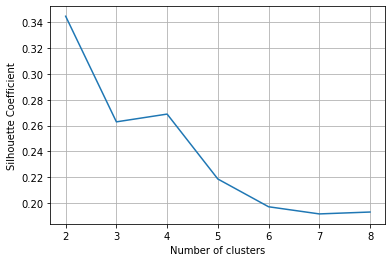

In [188]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Lets take numbers of clusters as 3

In [191]:
km = KMeans(n_clusters=3)
clusters = km.fit(df_scaled)

In [192]:
km.labels_

array([1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

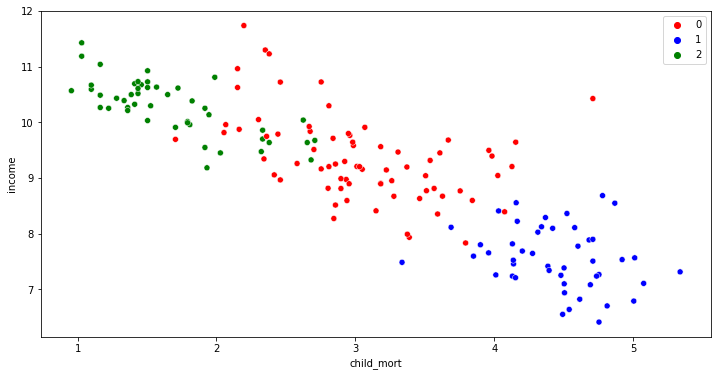

In [203]:
#plotting clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["child_mort"],y=df["income"],hue=km.labels_,palette={0:'r',1:'b',2:'g'})

By the above plot we see that n_clusters = 3 is grouping well, lets try for 4 clusters

In [197]:
km1 = KMeans(n_clusters=4)
clusters = km1.fit(df_scaled)

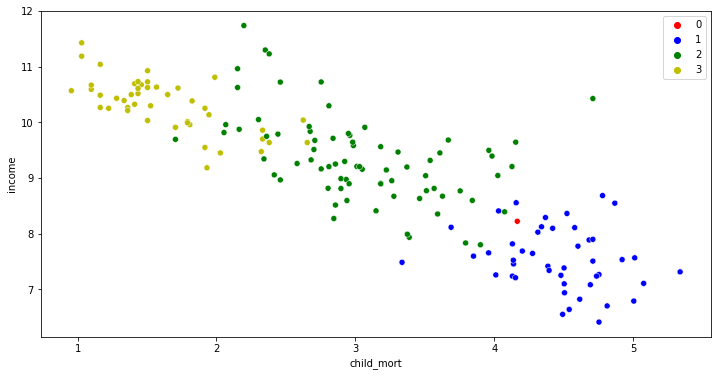

In [200]:
#plotting clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["child_mort"],y=df["income"],hue=km1.labels_,palette={0:'r',1:'b',2:'g',3:'y'})

By the above plot we can say that n =3 is the best

In [204]:
from sklearn.decomposition import PCA

In [ ]:
df_decom = pd.merge(pd.DataFrame(df_decom, columns=["PCA1", "PCA2"]),pd.DataFrame(C.labels_, columns=["cluster"]),how="inner", right_index=True, left_index=True)

In [205]:
p_error = {}
for i in range(1,10):
  p = PCA(n_components=i)
  cv = p.fit(df_scaled)
  p_error[i]=sum(p.explained_variance_ratio_)

In [206]:
p_error

{1: 0.5252702667495196,
 2: 0.702770954550056,
 3: 0.8383787483909984,
 4: 0.9054228932446531,
 5: 0.9454375176723867,
 6: 0.9774642054994032,
 7: 0.990511692003226,
 8: 0.998568014256176,
 9: 1.0000000000000002}

In [212]:
#dimention reduction for visualization
pca = PCA(n_components=2)
decom = pca.fit_transform(df_scaled)

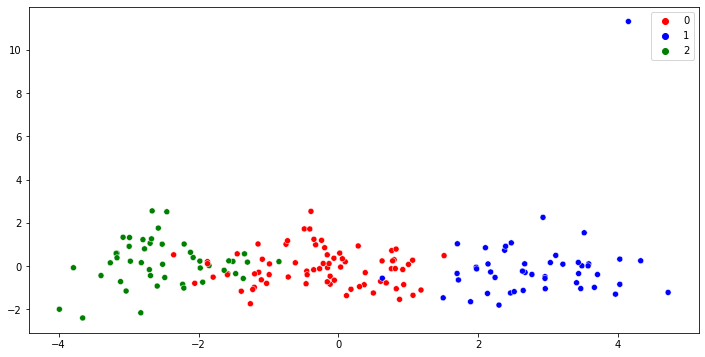

In [213]:
#plotting clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x=decom[:,0],y=decom[:,1],hue=km.labels_,palette={0:'r',1:'b',2:'g'})

In [219]:
df_cluster = pd.merge(df,pd.DataFrame(km.labels_, columns=["clusters"]),how="inner", right_index=True, left_index=True)

In [220]:
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,4.502029,2.302585,7.58,3.804438,7.383989,2.244956,1.393498,5.82,6.315358,1
1,Albania,2.809403,3.332205,6.55,3.883624,9.203316,1.501853,1.466646,1.65,8.316300,0
2,Algeria,3.306887,3.648057,4.17,3.446808,9.464983,2.778819,1.467250,2.89,8.402904,0
3,Angola,4.779123,4.131961,2.85,3.758872,8.682708,3.109061,1.410013,6.16,8.169053,1
4,Antigua and Barbuda,2.332144,3.817712,6.03,4.075841,9.857444,0.364643,1.468152,2.13,9.409191,2


In [249]:
grp = df_cluster.groupby("clusters",as_index=False).agg({"child_mort":'mean',"health":'mean',"income":'mean',"gdpp":'mean'})

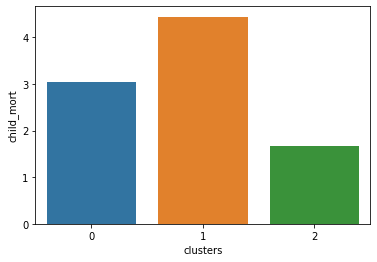

In [253]:
sns.barplot(x=grp["clusters"],y=grp["child_mort"])
#sns.barplot(x=grp["clusters"],y=grp["income"])


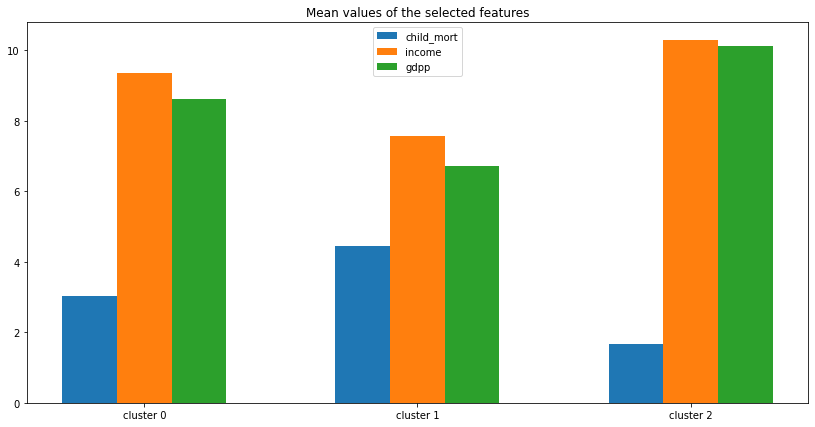

In [267]:
plt.figure(figsize=(14,7))
x = np.arange(len(df_cluster["clusters"].unique()))
plt.bar(x-0.2,grp["child_mort"], label='child_mort',width=0.2)
plt.bar(x,grp["income"], label='income',width = 0.2)
plt.bar(x+0.2,grp["gdpp"], label='gdpp',width=0.2)
plt.xticks(x,["cluster 0","cluster 1","cluster 2"])
plt.title("Mean values of the selected features")
plt.legend()
plt.show()

By the above graph we can see that the countries belonging to cluster 1 needs the help the most followed by cluster 0 and cluster 2

In [276]:
#Top 10 countries that the HELP International have to address first
df_cluster[df_cluster["clusters"]==1].sort_values(by=["gdpp","income","child_mort"],ascending=True)["country"][:10]

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object